# Exploring the dataset

In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import seaborn as sns

from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
from scripts.dataset import Dataset

sns.set_theme(palette=sns.color_palette("rocket"))

## Downloading the dataset

In [26]:
local_path = kagglehub.dataset_download("asdasdasasdas/garbage-classification")
dataset_path = os.path.join(local_path, "Garbage classification", "Garbage classification")
dataset = Dataset(dataset_path=dataset_path, preload=True)

[LOG] Importing data from C:\Users\limag\.cache\kagglehub\datasets\asdasdasasdas\garbage-classification\versions\2\Garbage classification\Garbage classification, mode = local
[LOG] Preloading the dataset


100%|██████████| 2527/2527 [00:02<00:00, 1153.81it/s]


In [27]:
df = dataset.metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2527 entries, 789 to 2162
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_name  2527 non-null   object
 1   class_name  2527 non-null   object
 2   image_path  2527 non-null   object
 3   label       2527 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 98.7+ KB


## Exploring the dataset

In [28]:
classes = df['class_name'].unique()
print(f"{len(classes)} classes: {', '.join(classes)}")

6 classes: glass, cardboard, plastic, metal, trash, paper


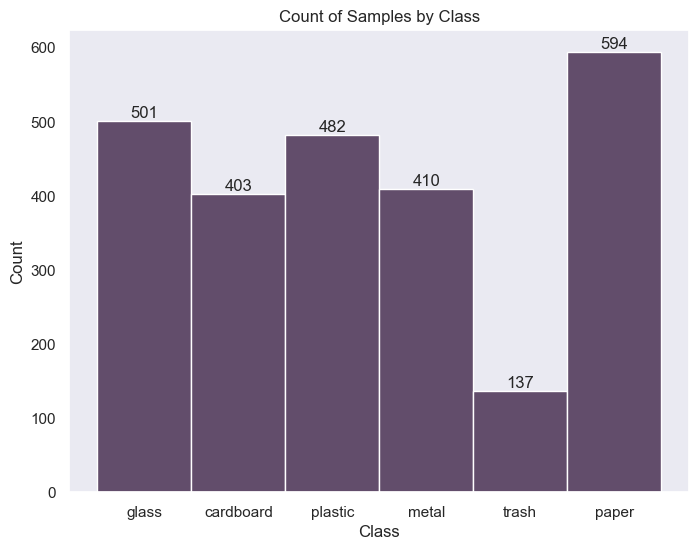

In [29]:
plt.figure(figsize=(8,6))
plt.title("Count of Samples by Class")
ax = sns.histplot(data=df, x="class_name")
ax.bar_label(ax.containers[0], fmt="%d")
plt.grid(False)
plt.xlabel("Class")
plt.show()

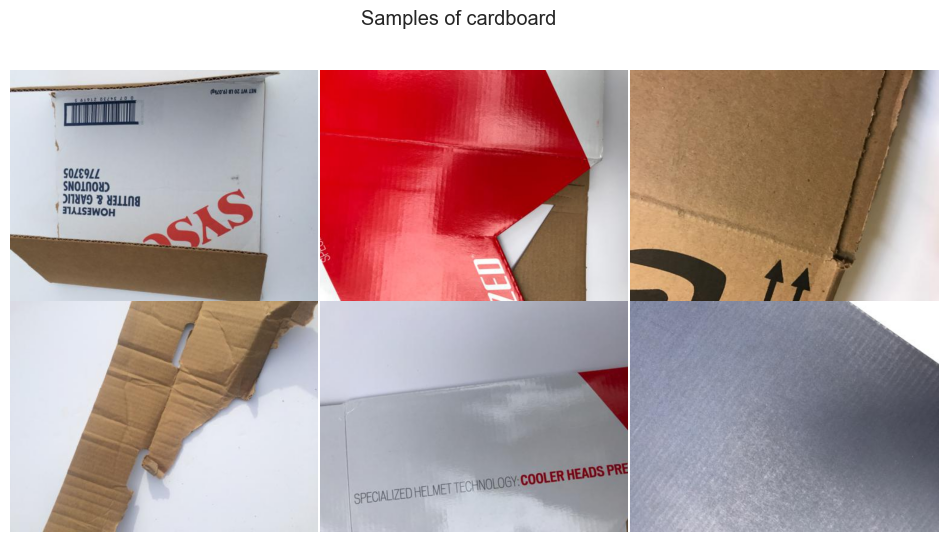

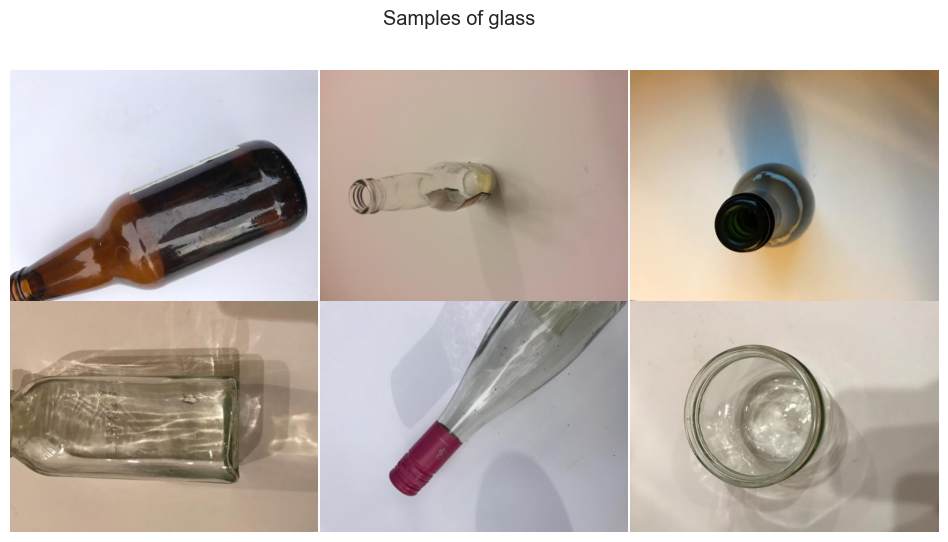

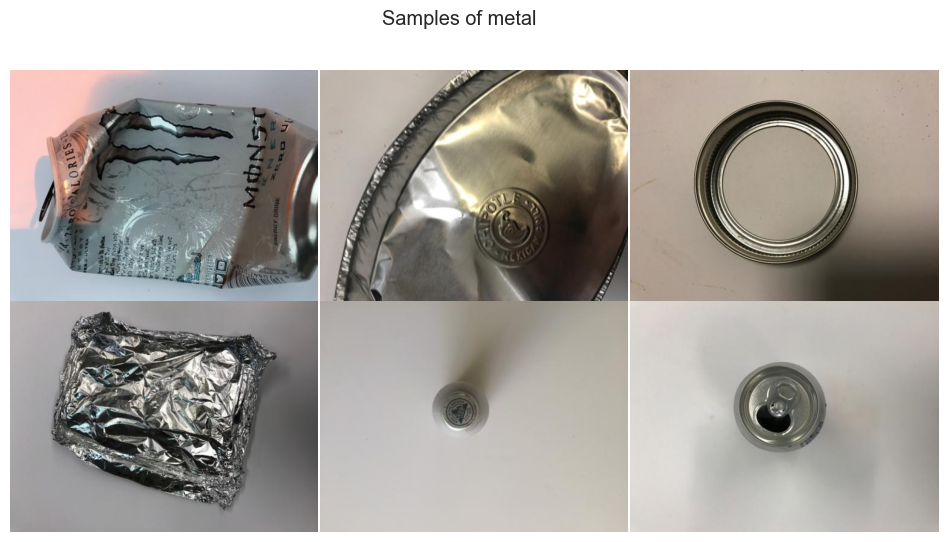

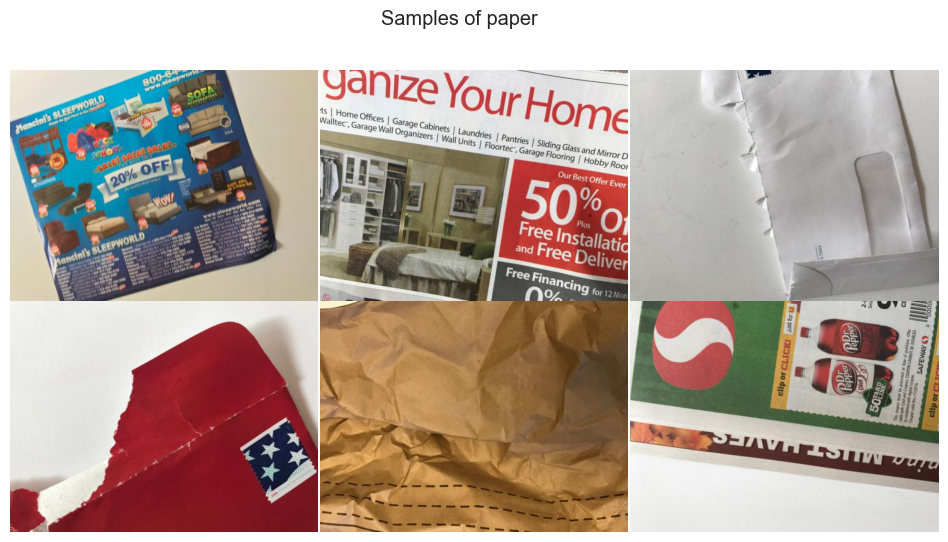

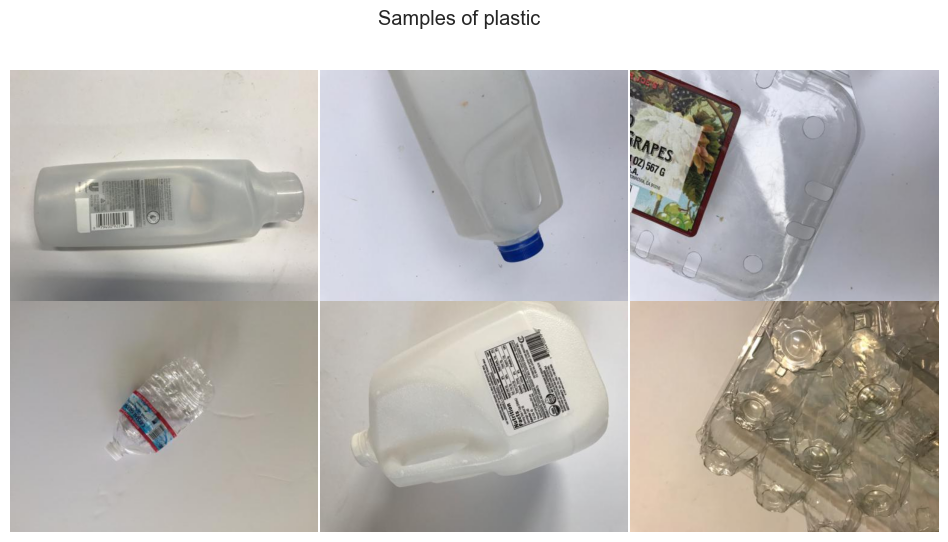

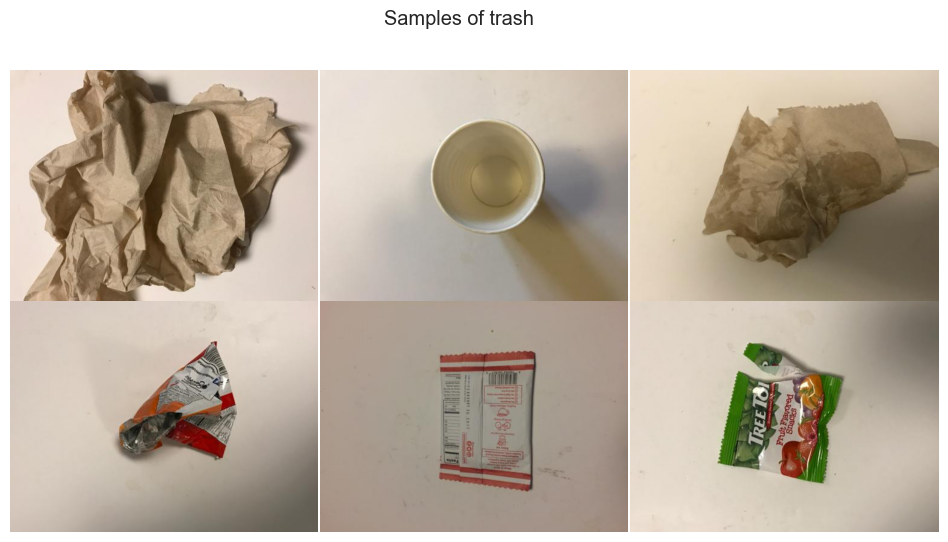

In [30]:
for class_name, samples in df.groupby(by="class_name"):
    samples = samples.sample(6)
    figure, axis = plt.subplots(2, 3, squeeze=False, figsize=(12,6))
    figure.suptitle(f"Samples of {class_name}")
    axes = []
    for ax in axis:
        axes += [*ax]
    for index in range(6):
        ax = axes[index]
        sample = samples.iloc[index]
        x, _, _ = dataset.load_sample_from_dataframe(sample)
        ax.axis("off")
        ax.imshow(x)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

## Cross-validation - Holdout

Using: 80% **train-validation** / 20% **test** 

In [31]:
def format_count(count: int):
    percent = round(100*(count/len(df)))    
    return f"{percent}%"

df_train_val, df_test = train_test_split(df, train_size=.8, stratify=df["class_name"])
df_train, df_val = train_test_split(df_train_val, train_size=.8)

table = PrettyTable(["partition name", "count", "count (%)"])
table.add_row(["train", len(df_train), format_count(len(df_train))])
table.add_row(["validation", len(df_val), format_count(len(df_val))])
table.add_row(["test", len(df_test), format_count(len(df_test))])
table.add_divider()
table.add_row(["total", len(df), "100%"])
print(table)

+----------------+-------+-----------+
| partition name | count | count (%) |
+----------------+-------+-----------+
|     train      |  1616 |    64%    |
|   validation   |  405  |    16%    |
|      test      |  506  |    20%    |
+----------------+-------+-----------+
|     total      |  2527 |    100%   |
+----------------+-------+-----------+


In [32]:
df_test["partition_name"] = "test"
df_val["partition_name"] = "val"
df_train["partition_name"] = "train"

df = pd.concat([df_train, df_test, df_val])

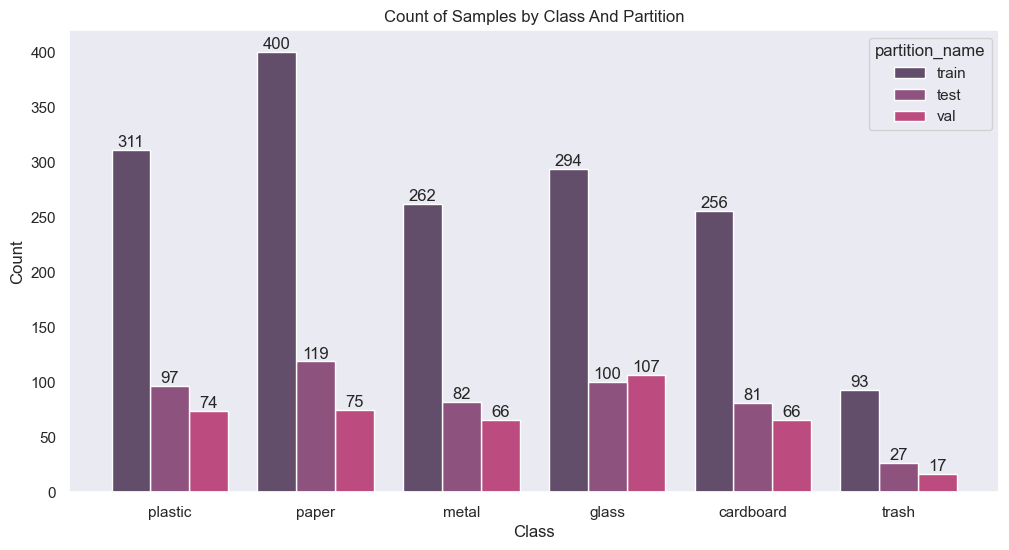

In [33]:
plt.figure(figsize=(12,6))
plt.title("Count of Samples by Class And Partition")
ax = sns.histplot(data=df, x="class_name", hue="partition_name", multiple="dodge", shrink=.8)
ax.bar_label(ax.containers[0], fmt="%d")
ax.bar_label(ax.containers[1], fmt="%d")
ax.bar_label(ax.containers[2], fmt="%d")
plt.xlabel("Class")
plt.grid(False)
plt.show()

## Saving datasets

In [34]:
current_path = os.getcwd()
dataset_path = os.path.join(current_path, "dataset.csv")
df.to_csv(dataset_path, index=False, sep=";")